<a target="_blank" href="https://colab.research.google.com/github/Detroxsys/RP-2023-2/blob/main/Laboratorios/Lab12%20RedesNeuronales/Lab12_RedesNeuronales.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio 12: Introducción a Redes Neuronales con TensorFlow

Material relacionado: 
* [Curso de Aprendizaje Automático II, UDC](https://github.com/eirasf/GCED-AA2)
* [ML-Course Neural Networks](https://ml-course.github.io/master/notebooks/08%20-%20Neural%20Networks.html)
* [ML-Course Neural Networks, example](https://ml-course.github.io/master/labs/Lab%206%20-%20Tutorial)

En este laboratorio, construiremos redes neuronales densas en el conjunto de datos MNIST.


In [7]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import tensorflow.keras as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Carga de datos y construcción de los conjuntos de training y test

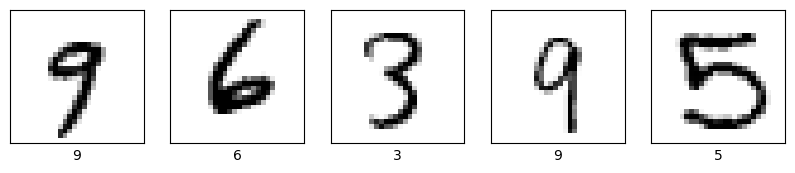

In [8]:
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [9]:
# Para MNIST, existe un muestreo estratificado predefinido de partición en 
# training-test train-test de 60000-10000. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Ejercicio 1: Preprocesamiento
* Normalice los datos: asigne cada valor de característica desde su representación actual (un número entero entre 0 y 255) a un valor de coma flotante entre 0 y 1,0.

* Almacene los valores de punto flotante en las variables  **x_train_normalized** y **x_test_normalized**.

* Mapear la etiqueta de clase a un valor codificado con one-hot-encoding. Almacene en **y_train_encoded** y **y_test_encoded**.

## Ejercicio 2: crear un modelo de red neuronal profunda

Implemente una función **create_model** que defina la topografía de la red neuronal profunda, especificando lo siguiente:

* El número de capas en la red neuronal profunda: use 2 capas densas por ahora.

* El número de nodos en cada capa: estos son parámetros de su función.

* Cualquier capa de regularización. Agregue al menos una capa de dropout.

* El optimizador y la tasa de aprendizaje. Haga que la tasa de aprendizaje también sea un parámetro de su función.

**Considerar:**

* ¿Cuál debería ser la forma de la capa de entrada?

* ¿Qué función de activación necesitará para la última capa, ya que este es un problema de clasificación de 10 clases?

In [10]:
### Crear un modelo de red neuronal
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    pass

## Ejercicio 3: Crear una función de entrenamiento

Implemente una función **train_model** que entrene y evalúe un modelo determinado. Debe hacer una división de validación del conjunto de  train e informar la pérdida y precisión del train y la validación, y devolver el historial de entrenamiento.

In [11]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: Modelo a entrenar
    X, y: Etiquetas de datos de entrenamiento.
    validation_split: Porcentaje de datos para el conjunto de validación.
    epochs: Número de épocas a entrenar. 
    batch_size: El tamaño de batch para SGD. 
    """
    pass

## Ejercicio 4: Evaluar el modelo
Entrene el modelo con una tasa de aprendizaje de **0.003**, 50 épocas, un tamaño de lote de 4000 y un conjunto de validación que sea el 20 % de los datos de entrenamiento totales. Utilice la configuración predeterminada. Trace la curva de aprendizaje de la pérdida, la pérdida de validación, la precisión y la precisión de la validación. Finalmente, informe el rendimiento en el conjunto de prueba.

Siéntase libre de usar la función de trazado a continuación, o implemente la devolución de llamada del tutorial para ver los resultados en tiempo real.

In [12]:
# history: El historial del modelo entrenado.
# list_of_metrics: Métricas para hacer la gráfica.
def plot_curve(history, list_of_metrics):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m, lw=2)

    plt.legend()

## Ejercicio 5: Optimizar el modelo
Intente optimizar el modelo, ya sea manualmente o con un método de ajuste. Al menos optimizar lo siguiente:

* el número de capas ocultas

* El número de nodos en cada capa

* La cantidad de capas de abandono y la tasa de abandono

**Debe de alcanzar al menos un 96 % de precisión con respecto al conjunto de prueba.**